In [1]:
import numpy as np

def gaus_decay(d, strength):
    return np.exp(-0.5 * (d / strength) ** 2)

# Set parameters
N = 200  # Define N (assuming 200 as an example)
d = np.random.rand(N, N) * 10  # Random distance matrix as placeholder

# Generate underlying spatial random field (USRF)
USRF = np.empty((N, 3))

# No autocorrelation
np.random.seed(3)
USRF[:, 0] = np.random.normal(0.5, np.sqrt(0.4), N)

# Random field with moderate spatial autocorrelation
np.random.seed(26)
Corr = gaus_decay(d, 5)
USRF[:, 1] = Corr @ np.random.normal(0.02, np.sqrt(0.05), N)

# Clustered data
np.random.seed(2)
centres = [24, 26, 106, 122]  # Centre of clusters
radii = [1.5, 1.5, 2.7, 2.1]  # Radius of clusters
strengths = [5, 5, 5, 5]  # Relative strength of autocorrelation
clust_means = [0.001, 0.015, 0.003, -0.005]  # Homogeneity control

for k in range(len(centres)):
    Corr = gaus_decay(d, strengths[k])
    cluster = np.where(d[centres[k], :] < radii[k])[0]
    USRF[cluster, 2] = (Corr @ np.random.normal(clust_means[k], np.sqrt(0.01), N))[cluster]

U_na = np.isnan(USRF[:, 2])
USRF[U_na, 2] = np.random.normal(-0.2, np.sqrt(0.1), np.sum(U_na))  # Background noise

# Generate covariate and coefficient
np.random.seed(2)
x = np.empty((N, 3))
for k in range(3):
    x[:, k] = (USRF[:, k] + 0.7) * np.random.normal(0.4, 0.3, N)

b = 0.4

# Generate noise
np.random.seed(1)
Noise = np.random.normal(0, np.sqrt(0.02), N)

# Generate [log] expected values
np.random.seed(5)
log_E = np.random.normal(1.4, np.sqrt(0.25), N) + np.abs(np.random.gamma(1, 1/2, N))

# Compute [log] observed values
Int = -1
log_obs = USRF + b * x + Noise[:, np.newaxis] + Int + log_E[:, np.newaxis]
obs = np.round(np.exp(log_obs)).astype(int)  # Convert to integer counts

# Adjust log_E so that maximum obs are < some cap
pop_cap = 70
too_large = np.unique(np.where(obs > pop_cap)[0])

while len(too_large) > 0:
    log_E[too_large] -= np.abs(np.random.normal(0.2, 0.2, len(too_large)))
    log_obs = USRF + b * x + Noise[:, np.newaxis] + Int + log_E[:, np.newaxis]
    obs = np.round(np.exp(log_obs)).astype(int)
    too_large = np.unique(np.where(obs > pop_cap)[0])

E = np.exp(log_E)

In [3]:
import matplotlib.pyplot as plt

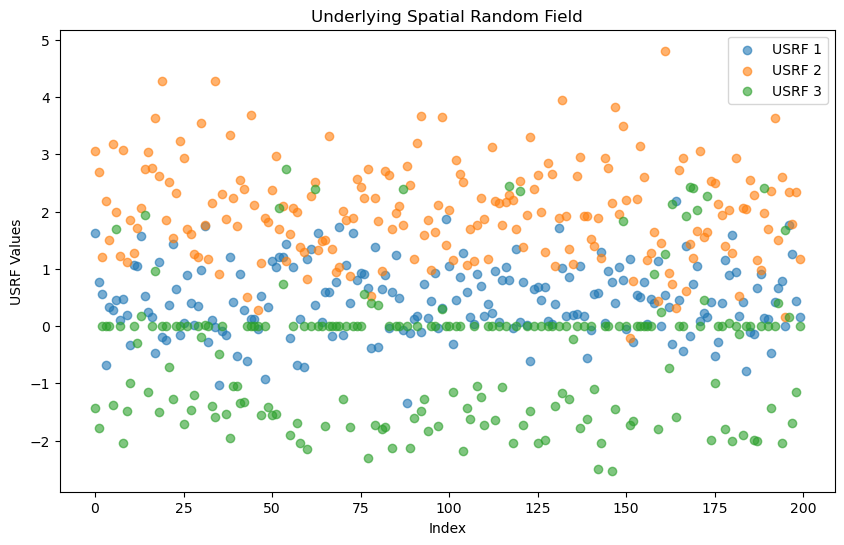

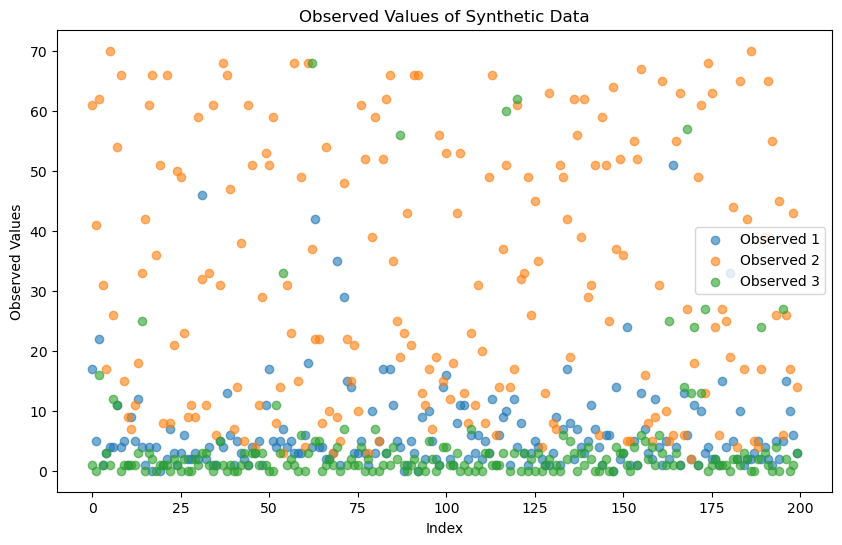

In [4]:

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(range(N), USRF[:, 0], label='USRF 1', alpha=0.6)
plt.scatter(range(N), USRF[:, 1], label='USRF 2', alpha=0.6)
plt.scatter(range(N), USRF[:, 2], label='USRF 3', alpha=0.6)
plt.xlabel("Index")
plt.ylabel("USRF Values")
plt.title("Underlying Spatial Random Field")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(N), obs[:, 0], label='Observed 1', alpha=0.6)
plt.scatter(range(N), obs[:, 1], label='Observed 2', alpha=0.6)
plt.scatter(range(N), obs[:, 2], label='Observed 3', alpha=0.6)
plt.xlabel("Index")
plt.ylabel("Observed Values")
plt.title("Observed Values of Synthetic Data")
plt.legend()
plt.show()
